# Machine Learning Capstone project

## Data Exploration

For stock price prediction finance data was downloaded from Yahoo finance https://finance.yahoo.com/quote/CSV/history?p=CSV. 

         Date         Open         High          Low        Close  \
0  2017-03-27  2329.110107  2344.899902  2322.250000  2341.590088   
1  2017-03-28  2339.790039  2363.780029  2337.629883  2358.570068   
2  2017-03-29  2356.540039  2363.360107  2352.939941  2361.129883   
3  2017-03-30  2361.310059  2370.419922  2358.580078  2368.060059   
4  2017-03-31  2364.820068  2370.350098  2362.600098  2362.719971   

     Adj Close      Volume  
0  2341.590088  3240230000  
1  2358.570068  3367780000  
2  2361.129883  3106940000  
3  2368.060059  3158420000  
4  2362.719971  3354110000  
Financial dataset has 252 data points with 7 variables each.


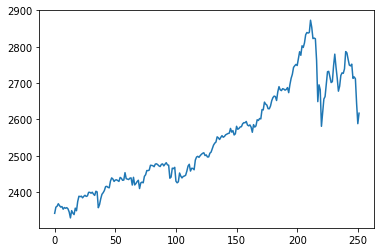

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime

# Import cross validation

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load prices dataset
data = pd.read_csv("GSPC.csv")

print(data.head())

featuresMy = []

ds_length = data.shape[0]

for index in range(len(data)):
    featuresMy.append([index])

prices = data['Adj Close']
# features = data.drop('Adj Close', axis = 1)

# Success
print ("Financial dataset has {} data points with {} variables each.".format(*data.shape))

plt.plot(prices)

## Exploratory Visualization

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

In [12]:
def test_stationarity(data):
    
    #Determing rolling statistics
    rolmean = data.rolling(window=20,center=False).mean()
    rolmean = data

    #Plot rolling statistics:
    orig = plt.plot(data, color='blue',label='Original line')
    mean = plt.plot(rolmean, color='red', label='With rolling mean')

    plt.title('Rolling Mean')

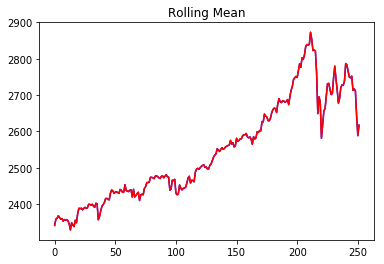

In [13]:
test_stationarity(prices)

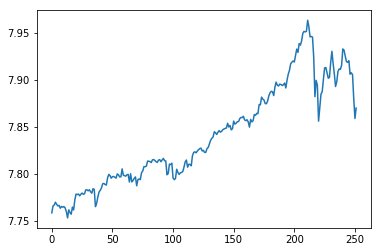

In [14]:
ts_log = np.log(prices)
plt.plot(ts_log)

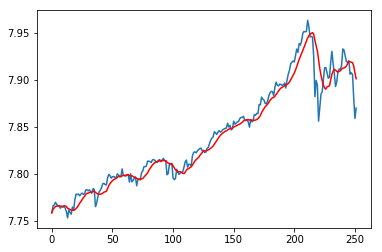

In [15]:
moving_avg = ts_log.rolling(min_periods=1,window=10,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [ ]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(featuresMy, prices, test_size=0.2, train_size=0.8, random_state=3)

# Success
print ("Training and testing split was successful.")

### Implementation: Fitting a Model

In [16]:
def test_results(historiacal, forecasted):
    
    #Plot rolling statistics
    plt.plot(historiacal, color='red', label='Historical')
    plt.plot(forecasted, color='blue', label='Predicted')
    plt.title('Test results')
    plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

Y_predict = np.copy(ts_log)
prediction_window = 30

for i in range(0, ds_length - prediction_window - 1):
    localPrices = ts_log[i:(prediction_window+i)]
    localFeatures = featuresMy[i:(prediction_window+i)]

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(localFeatures, localPrices, test_size=0.2, train_size=0.8, random_state=3)
    regr = RandomForestRegressor(random_state=0)
    regr.fit(X_train, y_train)
    
#     parameters = {'n_estimators':[50, 100, 500, 1000, 2000]}
#     regressor = RandomForestRegressor(random_state=0)
#     r2_scorer = make_scorer(r2_score)
#     grid_obj = GridSearchCV(estimator=regressor, param_grid=parameters, scoring=r2_scorer)
#     grid_obj = grid_obj.fit(X_train, y_train)
#     regr = grid_obj.best_estimator_

    predictedFeature = featuresMy[prediction_window+i+1]
    predictedPrice = regr.predict([predictedFeature]) 
    Y_predict[prediction_window+i+1] = predictedPrice[0]
    # print((prediction_window+i+1), predictedPrice, ts_log[prediction_window+i+1], (predictedPrice[0] - ts_log[prediction_window+i+1]), regr.score(X_test, y_test))

print("All price calculated")
print("Performance %d", performance_metric(ts_log, Y_predict))

All price calculated
('Performance %d', 0.9594487563926367)


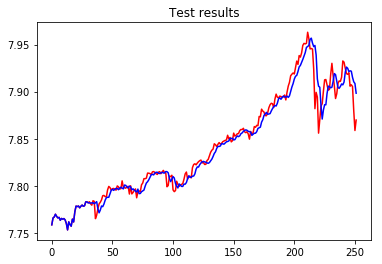

In [27]:
# Trying to predict new valies
test_results(ts_log, Y_predict)
# print(prices, Y_predict, prices - Y_predict)

In [26]:
from sklearn.linear_model import LinearRegression

Y_predict = np.copy(ts_log)
prediction_window = 30

for i in range(0, ds_length - prediction_window - 1):
    localPrices = ts_log[i:(prediction_window+i)]
    localFeatures = featuresMy[i:(prediction_window+i)]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(localFeatures, localPrices, test_size=0.2, train_size=0.8, random_state=3)
    regr = LinearRegression(n_jobs=10,copy_X=False)
    regr.fit(X_train, y_train)
    predictedFeature = featuresMy[prediction_window+i+1]
    predictedPrice = regr.predict([predictedFeature]) 
    Y_predict[prediction_window+i+1] = predictedPrice[0]
    print((prediction_window+i+1), predictedPrice, ts_log[prediction_window+i+1], (predictedPrice[0] - ts_log[prediction_window+i+1]), regr.score(X_test, y_test))

print("All price calculated")
print("Performance %d", performance_metric(ts_log, Y_predict))

# print regr.get_params()
# print 'LinearRegression test data score: ', regr.score(X_test, y_test)

31 [ 7.78052288] 7.78306978903 -0.00254690778405 0.197179676119
32 [ 7.78140413] 7.78090463741 0.000499494497789 0.239883735941
33 [ 7.78170894] 7.77942510209 0.00228383610406 0.508169702341
34 [ 7.78307526] 7.78419024439 -0.00111498907139 0.592863792624
35 [ 7.78431727] 7.78350311155 0.000814157096657 0.678344141679
36 [ 7.78547876] 7.7651576432 0.0203211129577 0.625756739287
37 [ 7.78649427] 7.76883768208 0.0176565841694 0.424078897445
38 [ 7.78475982] 7.77558238497 0.00917743160101 0.50697568177
39 [ 7.7827615] 7.78072924866 0.00203225572618 0.545332763288
40 [ 7.78295665] 7.78256543368 0.000391214622733 0.51973366115
41 [ 7.78602787] 7.78505146761 0.000976402098122 0.059847022163
42 [ 7.78652575] 7.78948357933 -0.00295782612616 0.198521860332
43 [ 7.78645507] 7.78979408112 -0.00333900671945 0.393772171735
44 [ 7.78666654] 7.78858873049 -0.00192218692859 0.532521537506
45 [ 7.78934732] 7.78812865599 0.00121866787643 -0.44439813892
46 [ 7.7897] 7.79567125167 -0.00597124893452 -0.9505

239 [ 7.89018189] 7.91533720571 -0.0251553194606 0.187353985065
240 [ 7.89054314] 7.93256675222 -0.0420236077991 0.185378159951
241 [ 7.89339929] 7.93129195518 -0.037892664271 0.200091216918
242 [ 7.90002872] 7.92490804474 -0.0248793259135 0.390578211621
243 [ 7.90726861] 7.9191670746 -0.0118984689963 -0.44251132058
244 [ 7.91302132] 7.91838483832 -0.00536352240704 0.0670259844418
245 [ 7.91526111] 7.9200868364 -0.00482572930896 0.350950178234
246 [ 7.91891584] 7.90578079582 0.0131350439141 0.241450129978
247 [ 7.92585434] 7.90726150429 0.0185928344474 0.340964319613
248 [ 7.92793714] 7.90541581244 0.0225213264099 0.270673968061
249 [ 7.92462441] 7.87993092518 0.0446934842561 0.533772575336
250 [ 7.925099] 7.85874111812 0.0663578825469 0.482998393711
251 [ 7.92293211] 7.86982597539 0.0531061327522 -0.172426765189
All price calculated
Performance %d 0.913235885226


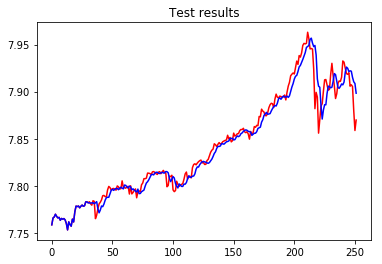

In [23]:
# Trying to predict new valies
test_results(ts_log, Y_predict)

In [115]:
from sklearn.neighbors import KNeighborsRegressor

Y_predict = np.copy(ts_log)
prediction_window = 60

for i in range(0, ds_length - prediction_window - 1):
    localPrices = ts_log[i:(prediction_window+i)]
    localFeatures = featuresMy[i:(prediction_window+i)]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(localFeatures, localPrices, test_size=0.2, train_size=0.8, random_state=3)
    regr = KNeighborsRegressor(n_neighbors=2)
    regr.fit(X_train, y_train)
    predictedFeature = featuresMy[prediction_window+i+1]
    predictedPrice = regr.predict([predictedFeature]) 
    Y_predict[prediction_window+i+1] = predictedPrice[0]
    print((prediction_window+i+1), predictedPrice, ts_log[prediction_window+i+1], (predictedPrice[0] - ts_log[prediction_window+i+1]), regr.score(X_test, y_test))

print("All price calculated")
print("Performance %d", performance_metric(ts_log, Y_predict))

# print regr.get_params()
# print 'KNeighborsClassifier test data score: ', regr.score(X_test, y_test)

61 [ 7.80189496] 7.79749667562 0.004398280341 0.936603113875
62 [ 7.79824397] 7.79905637425 -0.00081240570434 0.953442405709
63 [ 7.79772462] 7.79937212597 -0.00164750744819 0.88415091372
64 [ 7.79827652] 7.79126653962 0.00700998531598 0.900655328713
65 [ 7.79921425] 7.80003604102 -0.000821790912721 0.940925636426
66 [ 7.79531933] 7.79139882427 0.00392050852154 0.802798027963
67 [ 7.79565129] 7.79293088191 0.00272040841065 0.903672239532
68 [ 7.79571743] 7.79523905003 0.000478382616819 0.89488455129
69 [ 7.79216485] 7.79669127395 -0.00452642085326 0.765556170168
70 [ 7.79408497] 7.78727828666 0.00680667930668 0.934687687987
71 [ 7.79596516] 7.79366099938 0.00230416260632 0.877763697805
72 [ 7.79198478] 7.79458833549 -0.00260355518059 0.8587719147
73 [ 7.79046964] 7.79380534815 -0.00333570512575 0.875862378784
74 [ 7.79412467] 7.80108439922 -0.00695973178538 0.866345210798
75 [ 7.79419684] 7.80295722864 -0.00876038682436 0.863914771738
76 [ 7.79744487] 7.80761984505 -0.0101749713692 0.9

201 [ 7.91917414] 7.92572136588 -0.00654722186279 0.96723086189
202 [ 7.91926876] 7.93244829205 -0.0131795292747 0.978401960671
203 [ 7.92221685] 7.92891757892 -0.00670072607884 0.981356341305
204 [ 7.92908483] 7.93828858523 -0.00920375625807 0.987348954101
205 [ 7.93068294] 7.93667088748 -0.00598795199167 0.977331134843
206 [ 7.93360308] 7.94104653563 -0.00744345355894 0.97153733929
207 [ 7.93747974] 7.94908090006 -0.0116011637058 0.963758322238
208 [ 7.93885871] 7.95125290499 -0.0123941934324 0.981307865207
209 [ 7.94506372] 7.95069277235 -0.00562905450709 0.978841327546
210 [ 7.9501669] 7.95129521177 -0.00112830925029 0.988464048705
211 [ 7.95097284] 7.96306684981 -0.012094011144 0.981382494631
212 [ 7.95099399] 7.95631211349 -0.00531812142761 0.993231383765
213 [ 7.95718103] 7.94535347091 0.0118275598772 0.98328378435
214 [ 7.95968948] 7.94584233679 0.0138471448606 0.985633408718
215 [ 7.95083279] 7.94519403813 0.00563875407375 0.990402508803
216 [ 7.9455979] 7.92375735785 0.021840

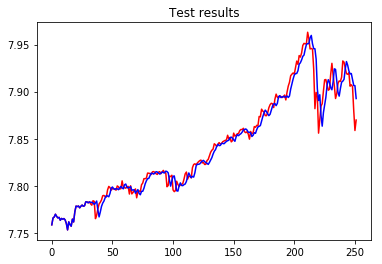

In [113]:
# Trying to predict new valies
test_results(ts_log, Y_predict)